# 주제선정: ABC 다국적 은행의 가입고객 이탈예측

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. customer_id (고객 ID):

- 역할: 각 고객을 고유하게 식별하는 ID입니다.
- 분석: 모델 학습에 직접 사용되지는 않지만, 고객별 분석이나 결과 확인 시 유용하게 사용됩니다. 중복된 ID는 없는지 확인해야 합니다.
- 이탈 예측 영향: 직접적인 영향은 없지만, 다른 정보와 결합하여 고객 세분화 등에 활용될 수 있습니다.

2. credit_score (신용 점수):

- 역할: 고객의 신용도를 나타내는 점수입니다.
- 분석: 신용 점수가 낮을수록 대출 상환 능력이 낮아 이탈할 가능성이 높을 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다. 일반적으로 신용 점수가 낮을수록 이탈률이 높아지는 경향이 있습니다.

3. country (국가):

- 역할: 고객의 거주 국가입니다.
- 분석: 국가별 경제 상황, 문화적 요인, 은행 서비스 이용 패턴 등이 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 국가별 이탈률 차이를 분석하여 특정 국가 고객에게 맞춤형 전략을 수립할 수 있습니다.

4. gender (성별):

- 역할: 고객의 성별입니다.
- 분석: 성별에 따른 금융 상품 선호도, 은행 이용 패턴 등이 다를 수 있습니다.
- 이탈 예측 영향: 성별별 이탈률 차이를 분석하여 특정 성별 고객에게 맞는 마케팅 전략을 수립할 수 있습니다.

5. age (나이):

- 역할: 고객의 나이입니다.
- 분석: 연령대별 금융 상품 이용 패턴, 라이프스타일 등이 다르기 때문에 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 특정 연령대에서 이탈률이 높다면 해당 연령대를 위한 맞춤형 서비스를 제공할 수 있습니다.

6. tenure (가입 기간):

- 역할: 고객이 은행에 가입한 기간 (년)입니다.
- 분석: 일반적으로 가입 기간이 짧은 고객이 이탈할 가능성이 높습니다. 장기 고객은 은행 서비스에 익숙하고 혜택을 누리고 있을 가능성이 높기 때문입니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

7. balance (잔액):

- 역할: 고객의 계좌 잔액입니다.
- 분석: 잔액이 적거나 없을 경우 은행 서비스 이용 필요성이 줄어들어 이탈 가능성이 높아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

8. products_number (상품 수):

- 역할: 고객이 이용하는 은행 상품의 개수입니다.
- 분석: 이용하는 상품 수가 많을수록 은행과의 관계가 깊어 이탈 가능성이 낮아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

9. credit_card (신용카드 보유 여부):

- 역할: 고객의 신용카드 보유 여부 (Yes/No 또는 1/0)입니다.
- 분석: 신용카드 보유 고객은 은행 서비스 이용률이 높고, 다양한 금융 상품을 이용할 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

10. active_member (활동 고객 여부):

- 역할: 고객의 활동 여부 (Yes/No 또는 1/0)입니다.
- 분석: 활동 고객은 은행 서비스를 꾸준히 이용하고 있으므로 이탈 가능성이 낮습니다.
- 이탈 예측 영향: 매우 중요한 예측 변수입니다.

11. estimated_salary (추정 연봉):

- 역할: 고객의 추정 연봉입니다.
- 분석: 연봉이 높을수록 은행의 VIP 고객일 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

12. churn (이탈 여부):

- 역할: 고객의 이탈 여부 (Yes/No 또는 1/0)입니다. Target 변수입니다.
- 분석: 모델 학습을 통해 이탈 가능성이 높은 고객을 예측하는 것이 목표입니다.
- 이탈 예측 영향: 모델의 성능을 평가하는 기준이 됩니다.

---

### 기본 전처리

In [366]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


---

1. customer_id (고객 ID):

- 역할: 각 고객을 고유하게 식별하는 ID입니다.
- 분석: 모델 학습에 직접 사용되지는 않지만, 고객별 분석이나 결과 확인 시 유용하게 사용됩니다. 중복된 ID는 없는지 확인해야 합니다.
- 이탈 예측 영향: 직접적인 영향은 없지만, 다른 정보와 결합하여 고객 세분화 등에 활용될 수 있습니다.

In [368]:
# 'customer_id' 열에서 중복된 값이 있는지 확인
duplicated_customer_id = df['customer_id'].duplicated()
duplicated_customer_id.sum()

np.int64(0)

---

### dtype: 문자형

In [369]:
yes_obj_df = df.select_dtypes(include=['object'])
yes_obj_df

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


3. country (국가):

- 역할: 고객의 거주 국가입니다.
- 분석: 국가별 경제 상황, 문화적 요인, 은행 서비스 이용 패턴 등이 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 국가별 이탈률 차이를 분석하여 특정 국가 고객에게 맞춤형 전략을 수립할 수 있습니다.

In [370]:
yes_obj_df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

4. gender (성별):

- 역할: 고객의 성별입니다.
- 분석: 성별에 따른 금융 상품 선호도, 은행 이용 패턴 등이 다를 수 있습니다.
- 이탈 예측 영향: 성별별 이탈률 차이를 분석하여 특정 성별 고객에게 맞는 마케팅 전략을 수립할 수 있습니다.

In [371]:
yes_obj_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

---

### dtype: 숫자형

In [372]:
no_obj_df = df.select_dtypes(exclude=['object'])
no_obj_df

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


2. credit_score (신용 점수):

- 역할: 고객의 신용도를 나타내는 점수입니다.
- 분석: 신용 점수가 낮을수록 대출 상환 능력이 낮아 이탈할 가능성이 높을 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다. 일반적으로 신용 점수가 낮을수록 이탈률이 높아지는 경향이 있습니다.

In [373]:
# credit_score
# df['credit_score'].min(), df['credit_score'].max(), df['credit_score'].mean()
no_obj_df.iloc[:, 1].min(), no_obj_df.iloc[:, 1].max(), no_obj_df.iloc[:, 1].mean()

(np.int64(350), np.int64(850), np.float64(650.5288))

5. age (나이):

- 역할: 고객의 나이입니다.
- 분석: 연령대별 금융 상품 이용 패턴, 라이프스타일 등이 다르기 때문에 이탈에 영향을 미칠 수 있습니다.
- 이탈 예측 영향: 특정 연령대에서 이탈률이 높다면 해당 연령대를 위한 맞춤형 서비스를 제공할 수 있습니다.

In [374]:
# age
no_obj_df.iloc[:, 2].min(), no_obj_df.iloc[:, 2].max(), no_obj_df.iloc[:, 2].mean()

(np.int64(18), np.int64(92), np.float64(38.9218))

6. tenure (가입 기간):

- 역할: 고객이 은행에 가입한 기간 (년)입니다.
- 분석: 일반적으로 가입 기간이 짧은 고객이 이탈할 가능성이 높습니다. 장기 고객은 은행 서비스에 익숙하고 혜택을 누리고 있을 가능성이 높기 때문입니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

In [375]:
# tenure
no_obj_df.iloc[:, 3].min(), no_obj_df.iloc[:, 3].max(), no_obj_df.iloc[:, 3].mean()

(np.int64(0), np.int64(10), np.float64(5.0128))

7. balance (잔액):

- 역할: 고객의 계좌 잔액입니다.
- 분석: 잔액이 적거나 없을 경우 은행 서비스 이용 필요성이 줄어들어 이탈 가능성이 높아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

In [376]:
# balance
no_obj_df.iloc[:, 4].min(), no_obj_df.iloc[:, 4].max(), no_obj_df.iloc[:, 4].mean()

(np.float64(0.0), np.float64(250898.09), np.float64(76485.889288))

8. products_number (상품 수):

- 역할: 고객이 이용하는 은행 상품의 개수입니다.
- 분석: 이용하는 상품 수가 많을수록 은행과의 관계가 깊어 이탈 가능성이 낮아질 수 있습니다.
- 이탈 예측 영향: 중요한 예측 변수 중 하나입니다.

In [377]:
# products_number
no_obj_df.iloc[:, 5].min(), no_obj_df.iloc[:, 5].max(), no_obj_df.iloc[:, 5].mean()

(np.int64(1), np.int64(4), np.float64(1.5302))

9. credit_card (신용카드 보유 여부):

- 역할: 고객의 신용카드 보유 여부 (Yes/No 또는 1/0)입니다.
- 분석: 신용카드 보유 고객은 은행 서비스 이용률이 높고, 다양한 금융 상품을 이용할 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

In [378]:
# credit_card
no_obj_df.iloc[:, 6].min(), no_obj_df.iloc[:, 6].max(), no_obj_df.iloc[:, 6].mean()

(np.int64(0), np.int64(1), np.float64(0.7055))

10. active_member (활동 고객 여부):

- 역할: 고객의 활동 여부 (Yes/No 또는 1/0)입니다.
- 분석: 활동 고객은 은행 서비스를 꾸준히 이용하고 있으므로 이탈 가능성이 낮습니다.
- 이탈 예측 영향: 매우 중요한 예측 변수입니다.

In [379]:
# active_member
no_obj_df.iloc[:, 7].min(), no_obj_df.iloc[:, 7].max(), no_obj_df.iloc[:, 7].mean()

(np.int64(0), np.int64(1), np.float64(0.5151))

11. estimated_salary (추정 연봉):

- 역할: 고객의 추정 연봉입니다.
- 분석: 연봉이 높을수록 은행의 VIP 고객일 가능성이 높아 이탈률이 낮을 수 있습니다.
- 이탈 예측 영향: 이탈 예측에 영향을 미칠 수 있는 변수입니다.

In [380]:
# estimated_salary
no_obj_df.iloc[:, 8].min(), no_obj_df.iloc[:, 8].max(), no_obj_df.iloc[:, 8].mean()

(np.float64(11.58), np.float64(199992.48), np.float64(100090.239881))

12. churn (이탈 여부):

- 역할: 고객의 이탈 여부 (Yes/No 또는 1/0)입니다. Target 변수입니다.
- 분석: 모델 학습을 통해 이탈 가능성이 높은 고객을 예측하는 것이 목표입니다.
- 이탈 예측 영향: 모델의 성능을 평가하는 기준이 됩니다.

In [381]:
# churn
no_obj_df.iloc[:, 9].min(), no_obj_df.iloc[:, 9].max(), no_obj_df.iloc[:, 9].mean()

(np.int64(0), np.int64(1), np.float64(0.2037))

---

### dtype: 숫자형 (시각화)

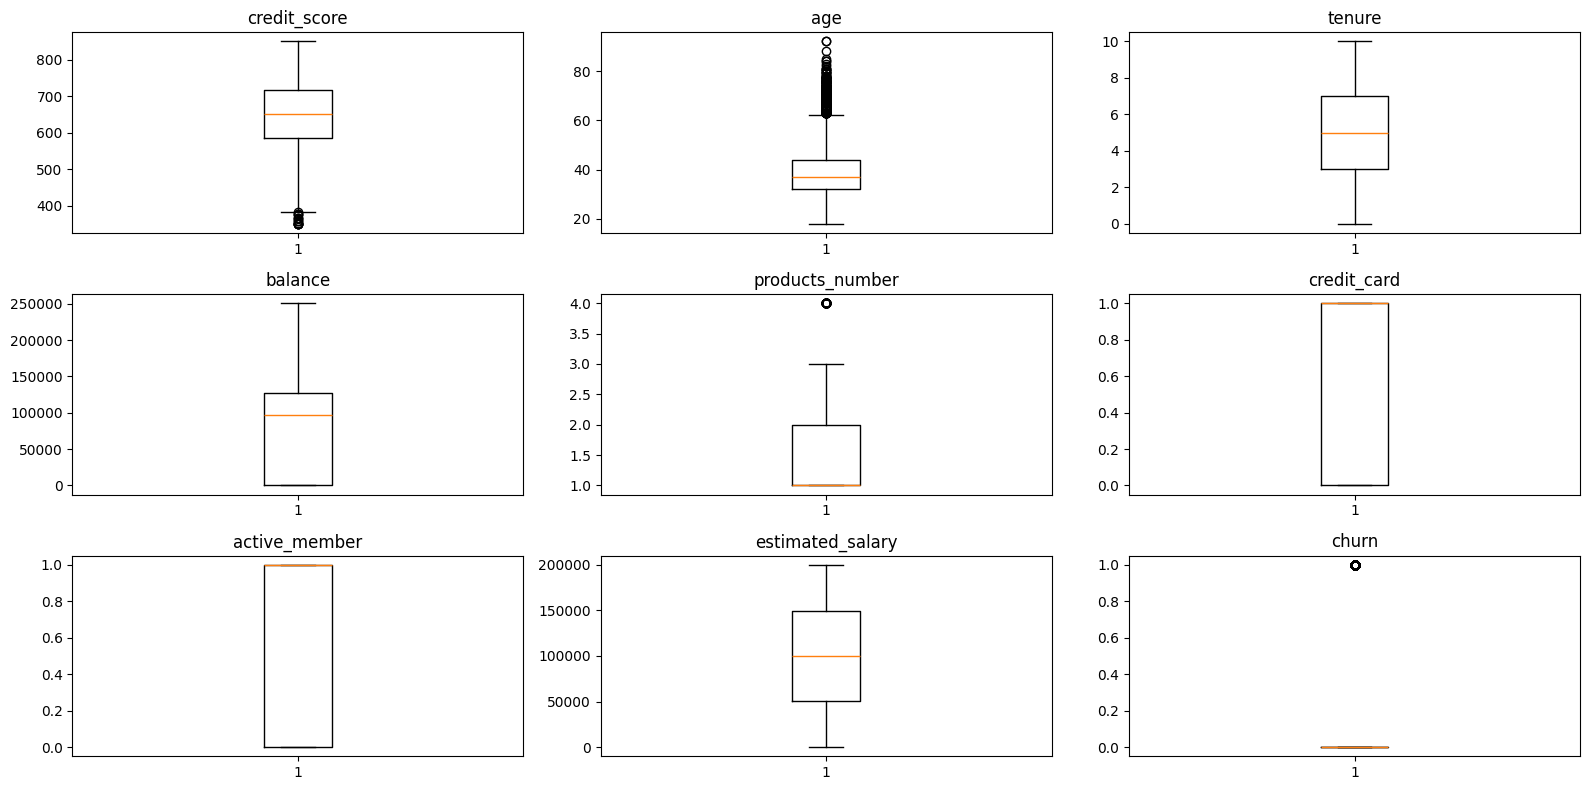

In [382]:
# customer_id 열 제외
only_count_df = no_obj_df.drop('customer_id', axis=1)

# subplot 생성 (3행 3열)
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# 각 subplot에 boxplot 그리기
cols = only_count_df.columns
k = 0  # subplot index
for i in range(3):
    for j in range(3):
        if k < len(cols): # 모든 column을 plot했는지 확인
          ax = axes[i, j]
          ax.boxplot(only_count_df[cols[k]], zorder=5)
          ax.set_title(cols[k])
          k += 1 # 다음 column index로 이동

# subplot 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()

---

### 심화 전처리

In [383]:
    # churn     active
# 0   비이탈     비활동
# 1    이탈       활동

# 비이탈_비활동 -> 휴면고객
# 비이탈_활동 -> 활동고객
# 이탈_비활동 -> 완전이탈고객
# 이탈_활동 -> 최근이탈이거나, 복귀고객이거나

churn_active = df.groupby('churn')['active_member'].value_counts()
churn_active

churn  active_member
0      1                4416
       0                3547
1      0                1302
       1                 735
Name: count, dtype: int64

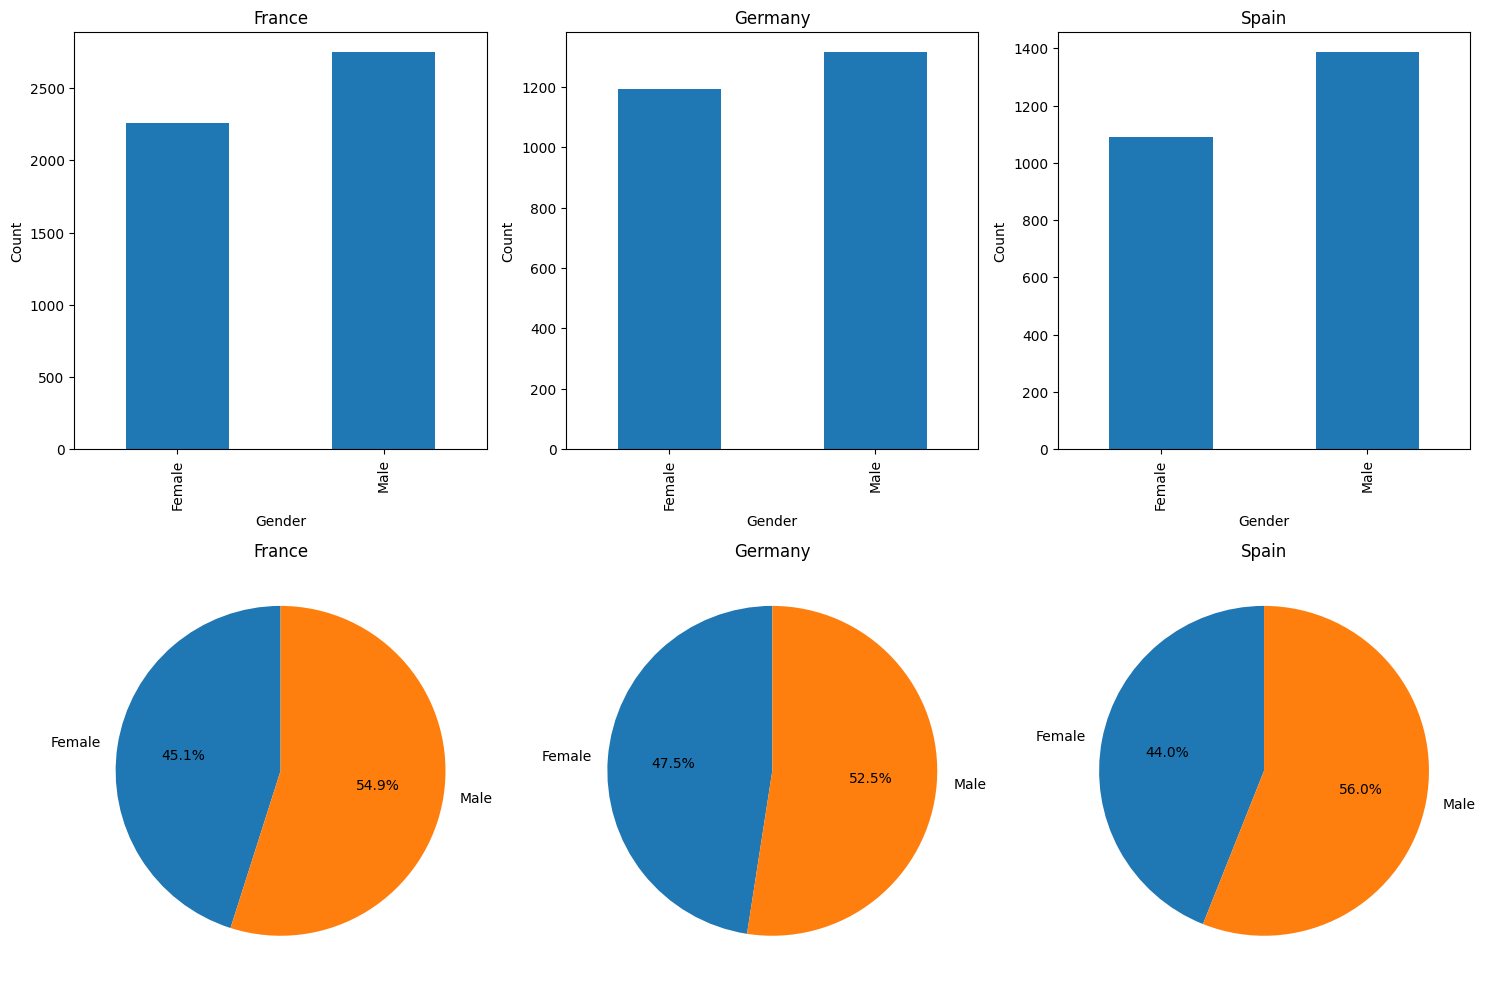

In [384]:
country_gender_df = df.groupby('country')['gender'].value_counts().unstack()

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figure size for better visualization

# Plot bar plots in the first row
for i, country in enumerate(country_gender_df.index):
    country_gender_df.loc[country].plot(kind='bar', ax=axes[0, i])  # Access subplots using 2D indexing
    axes[0, i].set_title(country)
    axes[0, i].set_xlabel('Gender')
    axes[0, i].set_ylabel('Count')
    axes[0, i].tick_params(axis='x', rotation=90)

# Plot pie plots in the second row
for i, country in enumerate(country_gender_df.index):
    # Calculate gender proportions for the pie chart
    gender_counts = country_gender_df.loc[country]
    proportions = gender_counts / gender_counts.sum()

    axes[1, i].pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)  # autopct for percentage display
    axes[1, i].set_title(country)
    axes[1, i].set_ylabel('')  # Remove unnecessary y-axis label

# Adjust layout and display plot
plt.tight_layout()
plt.show()

---

### 국가별 DataFrame

In [385]:
france_df = df[df['country'] == 'France']

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
france_df['gender'] = france_df['gender'].map({'Male': 0, 'Female': 1})

# customer_id 컬럼과 country 컬럼 삭제
france_df.drop(['customer_id', 'country'], axis=1, inplace=True)

france_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\140484513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_df['gender'] = france_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\140484513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_df.drop(['customer_id', 'country'], axis=1, inplace=True)


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,42,2,0.00,1,1,1,101348.88,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
6,822,0,50,7,0.00,2,1,1,10062.80,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
9994,800,1,29,2,0.00,2,0,0,167773.55,0
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1


age                 0.277646
gender              0.103180
balance             0.062290
estimated_salary    0.027104
tenure             -0.000697
credit_card        -0.004003
credit_score       -0.035084
products_number    -0.041848
active_member      -0.130749
Name: churn, dtype: float64


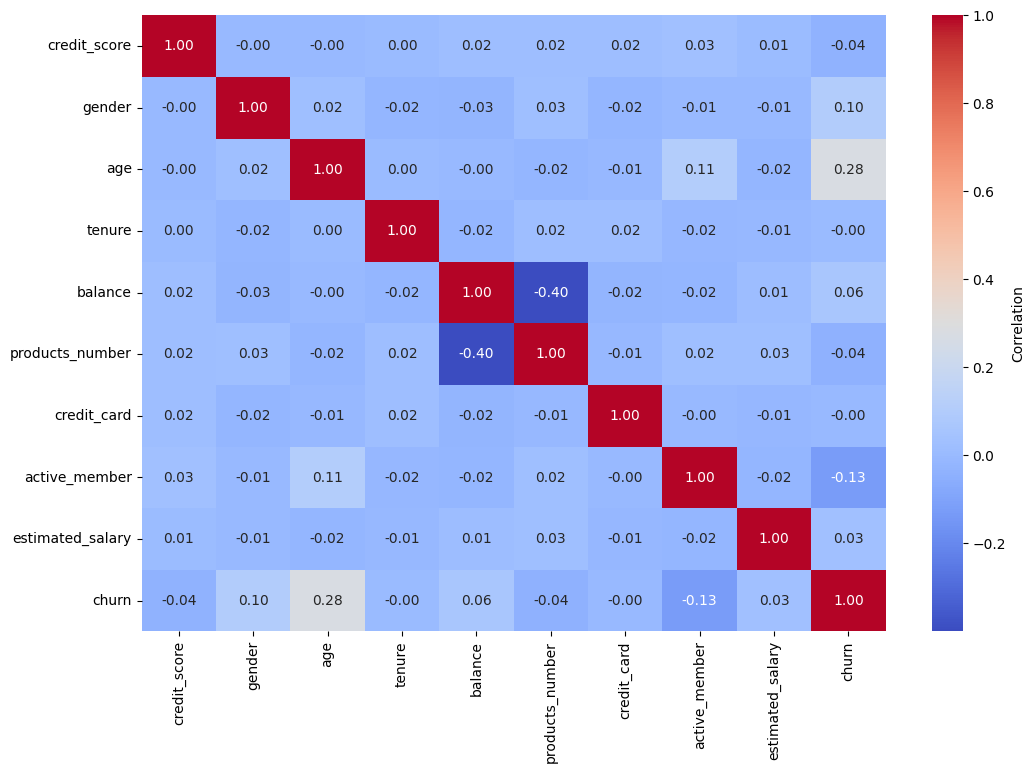

In [386]:
corr_matrix = france_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [387]:
germany_df = df[df['country'] == 'Germany']

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
germany_df['gender'] = germany_df['gender'].map({'Male': 0, 'Female': 1})

# customer_id 컬럼과 country 컬럼 삭제
germany_df.drop(['customer_id', 'country'], axis=1, inplace=True)

germany_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1232669383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_df['gender'] = germany_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1232669383.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_df.drop(['customer_id', 'country'], axis=1, inplace=True)


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,376,1,29,4,115046.74,4,1,0,119346.88,1
15,616,0,45,3,143129.41,2,0,1,64327.26,0
16,653,0,58,1,132602.88,1,1,0,5097.67,1
26,756,0,36,2,136815.64,1,1,1,170041.95,0
28,574,1,43,3,141349.43,1,1,1,100187.43,0
...,...,...,...,...,...,...,...,...,...,...
9982,655,1,46,7,137145.12,1,1,0,115146.40,1
9984,602,0,35,7,90602.42,2,1,1,51695.41,0
9986,673,0,47,1,183579.54,2,0,1,34047.54,0
9990,714,0,33,3,35016.60,1,1,0,53667.08,0


age                 0.337547
gender              0.103908
balance             0.016184
tenure             -0.000902
credit_card        -0.007643
credit_score       -0.026579
estimated_salary   -0.032234
products_number    -0.072940
active_member      -0.185409
Name: churn, dtype: float64


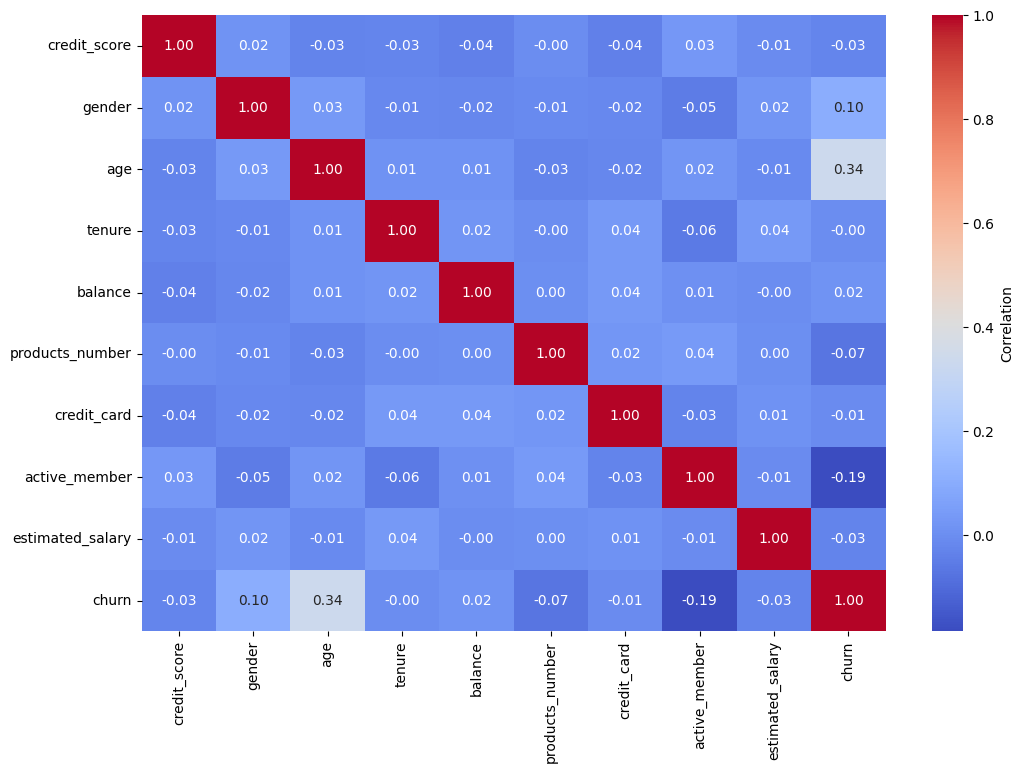

In [388]:
corr_matrix = germany_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [389]:
spain_df = df[df['country'] == 'Spain']

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
spain_df['gender'] = spain_df['gender'].map({'Male': 0, 'Female': 1})

# customer_id 컬럼과 country 컬럼 삭제
spain_df.drop(['customer_id', 'country'], axis=1, inplace=True)

spain_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\2566012984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df['gender'] = spain_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\2566012984.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df.drop(['customer_id', 'country'], axis=1, inplace=True)


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,608,1,41,1,83807.86,1,0,1,112542.58,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
5,645,0,44,8,113755.78,2,1,0,149756.71,1
11,497,0,24,3,0.00,2,1,0,76390.01,0
14,635,1,35,7,0.00,2,1,1,65951.65,0
...,...,...,...,...,...,...,...,...,...,...
9966,479,0,35,4,125920.98,1,1,1,20393.44,0
9980,741,0,35,6,74371.49,1,0,0,99595.67,0
9987,606,0,30,8,180307.73,2,1,1,1914.41,0
9989,841,0,28,4,0.00,2,1,1,179436.60,0


age                 0.225147
gender              0.107857
balance             0.074494
estimated_salary    0.032821
credit_score       -0.018252
products_number    -0.020637
credit_card        -0.021049
tenure             -0.058909
active_member      -0.168731
Name: churn, dtype: float64


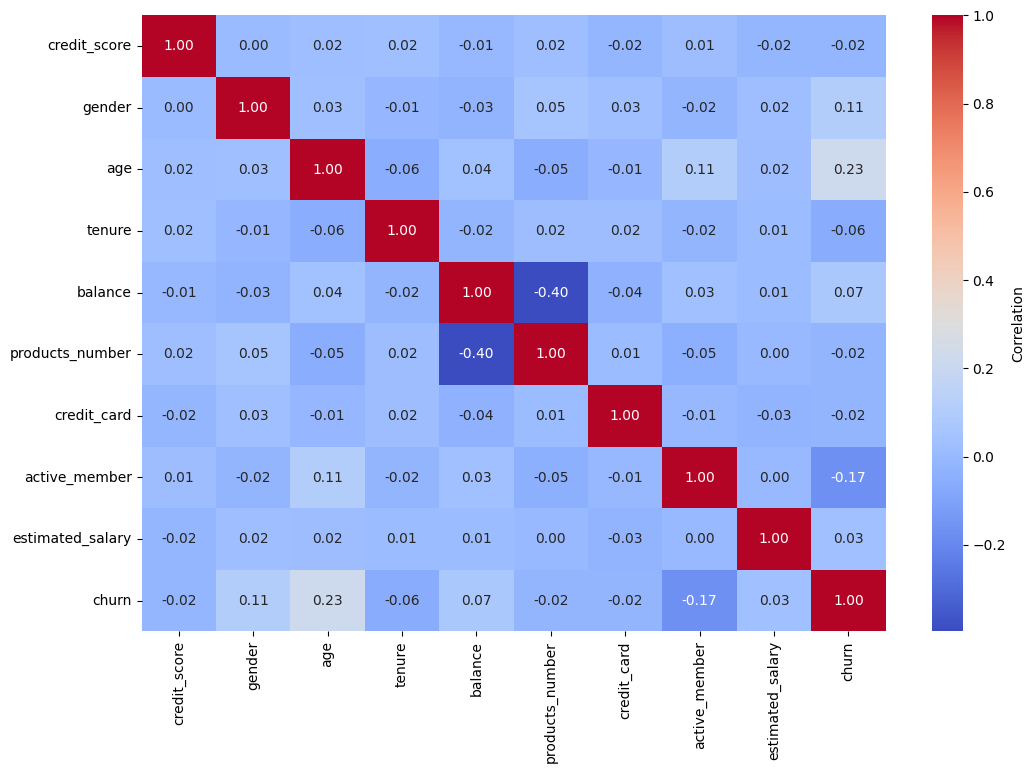

In [390]:
corr_matrix = spain_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

---

### 성별별 DataFrame

In [391]:
male_df = df[df['gender'] == 'Male']

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
male_df['country'] = male_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 gender 컬럼 삭제
male_df.drop(['customer_id', 'gender'], axis=1, inplace=True)

male_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\656968517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['country'] = male_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\656968517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df.drop(['customer_id', 'gender'], axis=1, inplace=True)


,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5,645,2,44,8,113755.78,2,1,0,149756.71,1
6,822,0,50,7,0.00,2,1,1,10062.80,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0
10,528,0,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...
9992,726,2,36,2,0.00,1,1,0,195192.40,0
9993,644,0,28,7,155060.41,1,1,0,29179.52,0
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0


age                 0.266700
balance             0.117361
country             0.033538
estimated_salary   -0.000618
credit_card        -0.007274
tenure             -0.018454
credit_score       -0.031574
products_number    -0.069994
active_member      -0.149243
Name: churn, dtype: float64


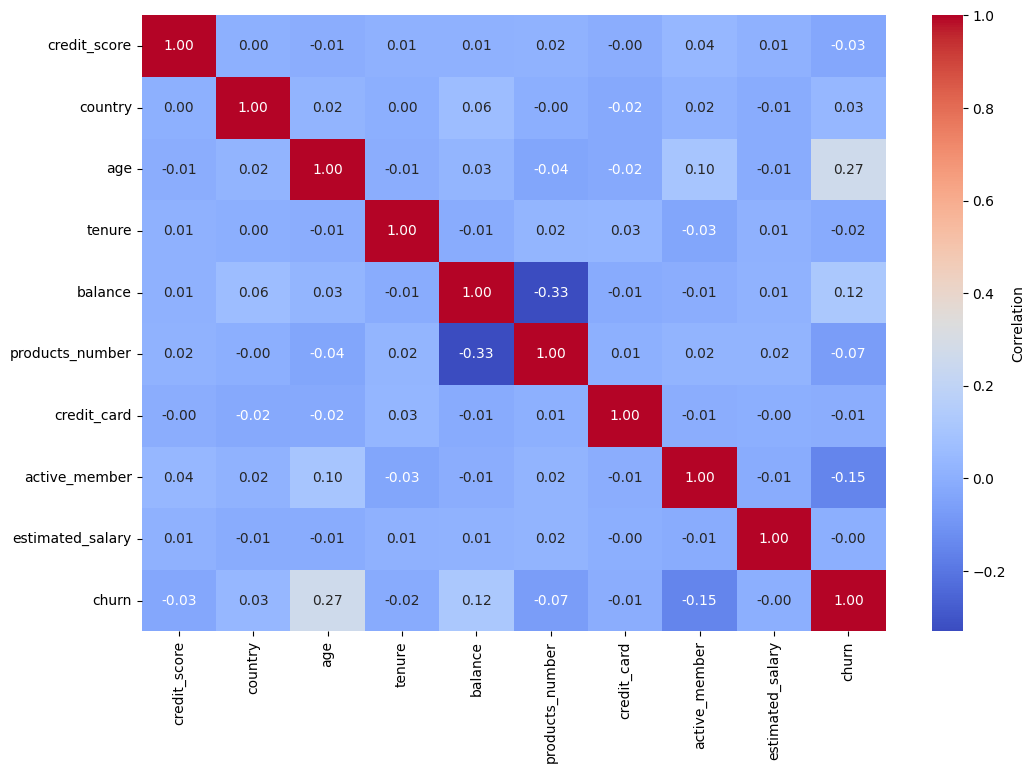

In [392]:
corr_matrix = male_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [393]:
female_df = df[df['gender'] == 'Male']

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
female_df['country'] = female_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 gender 컬럼 삭제
female_df.drop(['customer_id', 'gender'], axis=1, inplace=True)

female_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\3312935447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['country'] = female_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\3312935447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df.drop(['customer_id', 'gender'], axis=1, inplace=True)


,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
5,645,2,44,8,113755.78,2,1,0,149756.71,1
6,822,0,50,7,0.00,2,1,1,10062.80,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0
10,528,0,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...
9992,726,2,36,2,0.00,1,1,0,195192.40,0
9993,644,0,28,7,155060.41,1,1,0,29179.52,0
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0


age                 0.266700
balance             0.117361
country             0.033538
estimated_salary   -0.000618
credit_card        -0.007274
tenure             -0.018454
credit_score       -0.031574
products_number    -0.069994
active_member      -0.149243
Name: churn, dtype: float64


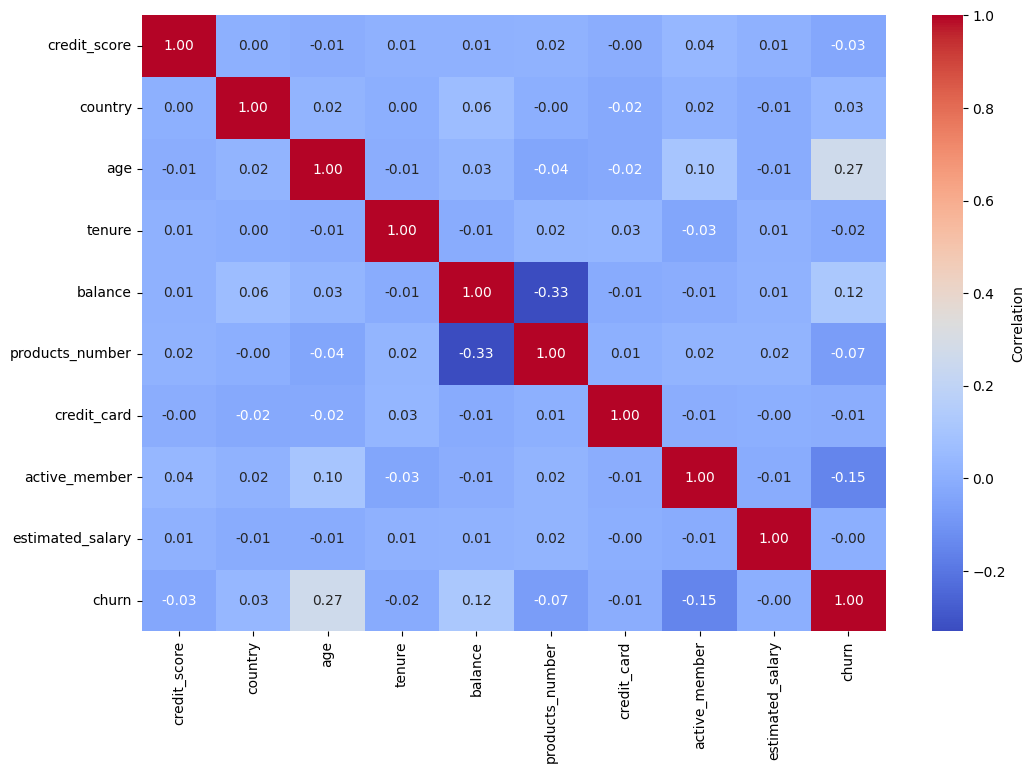

In [394]:
corr_matrix = female_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

---

### 상품개수별 DataFrame

In [397]:
one_df = df[df['products_number'] == 1]

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
one_df['gender'] = one_df['gender'].map({'Male': 0, 'Female': 1})

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
one_df['country'] = one_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 products_number 컬럼 삭제
one_df.drop(['customer_id', 'products_number'], axis=1, inplace=True)

one_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1275470769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['gender'] = one_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1275470769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['country'] = one_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1275470769.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,101348.88,1
1,608,2,1,41,1,83807.86,0,1,112542.58,0
4,850,2,1,43,2,125510.82,1,1,79084.10,0
9,684,0,0,27,2,134603.88,1,1,71725.73,0
16,653,1,0,58,1,132602.88,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...
9992,726,2,0,36,2,0.00,1,0,195192.40,0
9993,644,0,0,28,7,155060.41,1,0,29179.52,0
9996,516,0,0,35,10,57369.61,1,1,101699.77,0
9997,709,0,1,36,7,0.00,0,1,42085.58,1


age                 0.304265
gender              0.110980
country             0.032937
estimated_salary    0.012442
credit_card        -0.000598
tenure             -0.014666
credit_score       -0.021691
balance            -0.075881
active_member      -0.198043
Name: churn, dtype: float64


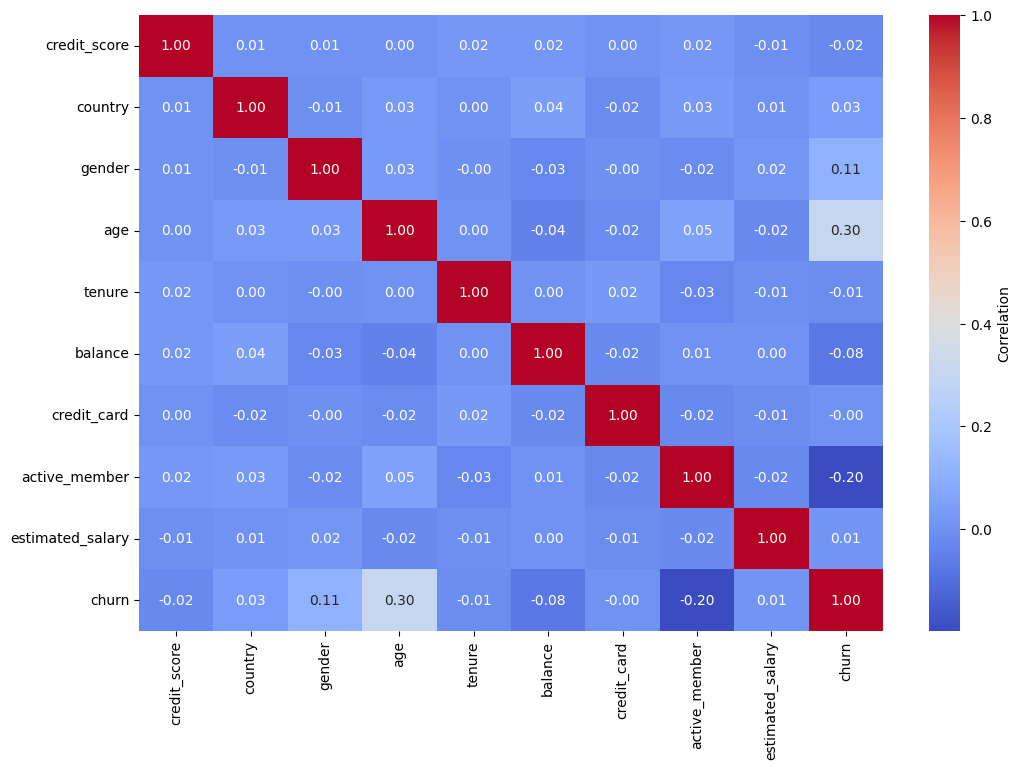

In [398]:
corr_matrix = one_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [399]:
two_df = df[df['products_number'] == 2]

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
two_df['gender'] = two_df['gender'].map({'Male': 0, 'Female': 1})

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
two_df['country'] = two_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 products_number 컬럼 삭제
two_df.drop(['customer_id', 'products_number'], axis=1, inplace=True)

two_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1606771462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_df['gender'] = two_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1606771462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_df['country'] = two_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1606771462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
3,699,0,1,39,1,0.00,0,0,93826.63,0
5,645,2,0,44,8,113755.78,1,0,149756.71,1
6,822,0,0,50,7,0.00,1,1,10062.80,0
8,501,0,0,44,4,142051.07,0,1,74940.50,0
10,528,0,0,31,6,102016.72,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...
9988,775,0,0,30,4,0.00,1,0,49337.84,0
9989,841,2,0,28,4,0.00,1,1,179436.60,0
9994,800,0,1,29,2,0.00,0,0,167773.55,0
9995,771,0,0,39,5,0.00,1,0,96270.64,0


age                 0.194940
balance             0.175468
gender              0.089056
country             0.040887
estimated_salary    0.002138
tenure             -0.013790
credit_card        -0.018271
credit_score       -0.025565
active_member      -0.081573
Name: churn, dtype: float64


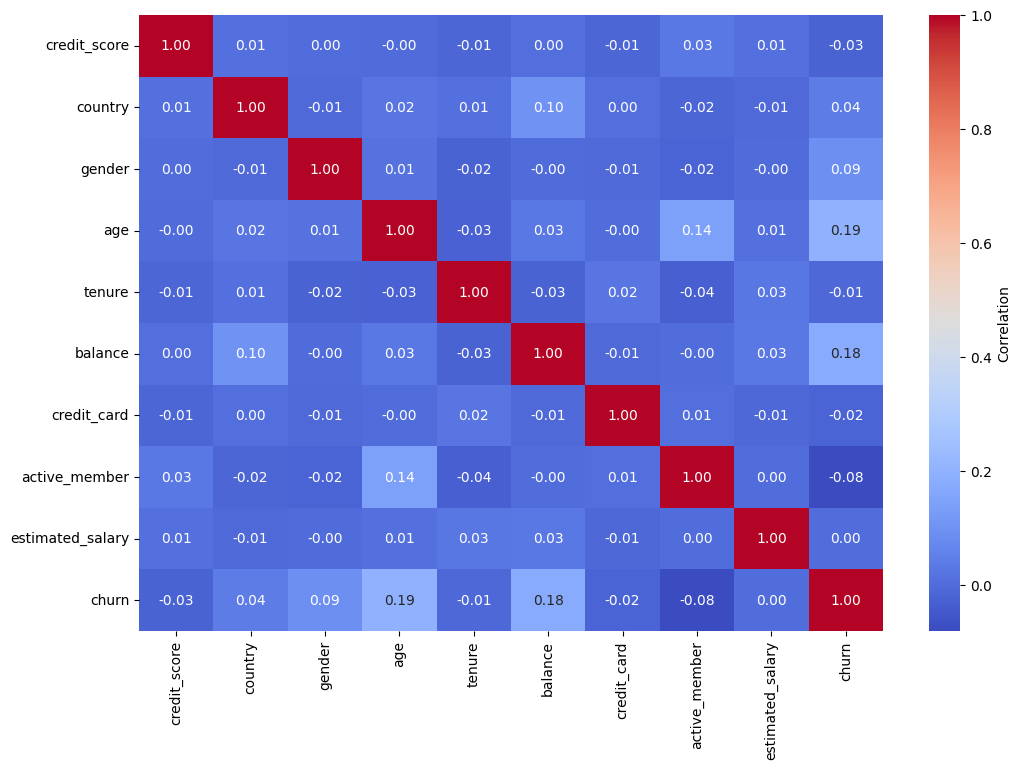

In [400]:
corr_matrix = two_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [401]:
three_df = df[df['products_number'] == 3]

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
three_df['gender'] = three_df['gender'].map({'Male': 0, 'Female': 1})

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
three_df['country'] = three_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 products_number 컬럼 삭제
three_df.drop(['customer_id', 'products_number'], axis=1, inplace=True)

three_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\385277281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_df['gender'] = three_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\385277281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_df['country'] = three_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\385277281.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
2,502,0,1,42,8,159660.80,1,0,113931.57,1
30,591,2,1,39,3,0.00,1,0,140469.38,1
88,646,0,1,46,4,0.00,1,0,93251.42,1
90,647,2,1,44,5,0.00,1,1,174205.22,1
227,547,1,1,39,6,74596.15,1,1,85746.52,1
...,...,...,...,...,...,...,...,...,...,...
9737,710,2,0,22,8,0.00,1,0,107292.91,0
9747,610,1,1,69,5,86038.21,0,0,192743.06,1
9800,762,2,1,35,3,119349.69,1,1,47114.18,1
9877,505,1,1,33,3,106506.77,1,0,45445.78,1


balance             0.361946
age                 0.258960
gender              0.115491
estimated_salary    0.097119
tenure              0.024810
country             0.018054
credit_card        -0.025148
credit_score       -0.105583
active_member      -0.170101
Name: churn, dtype: float64


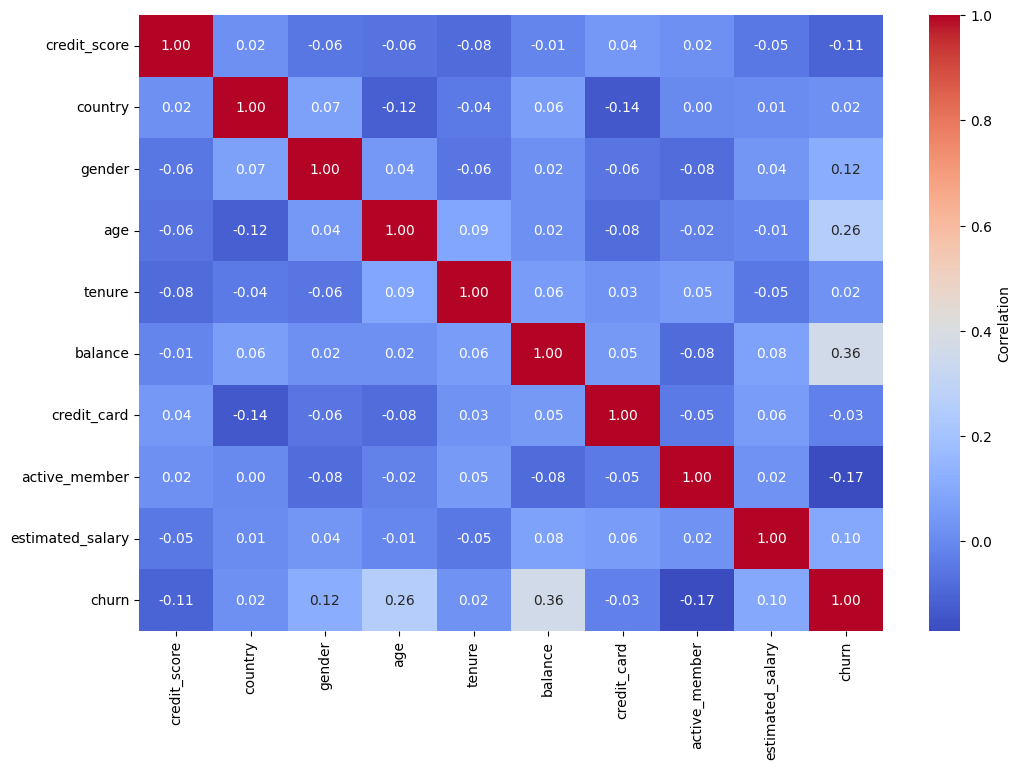

In [402]:
corr_matrix = three_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [ ]:
# 이거 churn 보면 죄다 이타치새끼들임 싹 다 구속시켜야함
four_df = df[df['products_number'] == 4]

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
four_df['gender'] = four_df['gender'].map({'Male': 0, 'Female': 1})

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
four_df['country'] = four_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 products_number 컬럼 삭제
four_df.drop(['customer_id', 'products_number'], axis=1, inplace=True)

four_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\2110454703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_df['gender'] = four_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\2110454703.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_df['country'] = four_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\2110454703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
7,376,1,1,29,4,115046.74,1,0,119346.88,1
70,738,1,0,58,2,133745.44,1,0,28373.86,1
1254,628,0,1,46,1,46870.43,1,0,31272.14,1
1469,819,1,1,49,1,120656.86,0,0,166164.30,1
1488,596,2,0,30,6,121345.88,1,0,41921.75,1
1701,792,0,0,50,9,0.00,1,1,194700.81,1
1876,640,1,0,39,9,131607.28,0,1,6981.43,1
2124,704,0,0,32,7,127785.17,0,0,184464.70,1
2196,773,1,0,47,2,118079.47,1,1,143007.49,1
2285,630,1,0,50,3,129370.91,1,1,47775.34,1


credit_score       NaN
country            NaN
gender             NaN
age                NaN
tenure             NaN
balance            NaN
credit_card        NaN
active_member      NaN
estimated_salary   NaN
Name: churn, dtype: float64


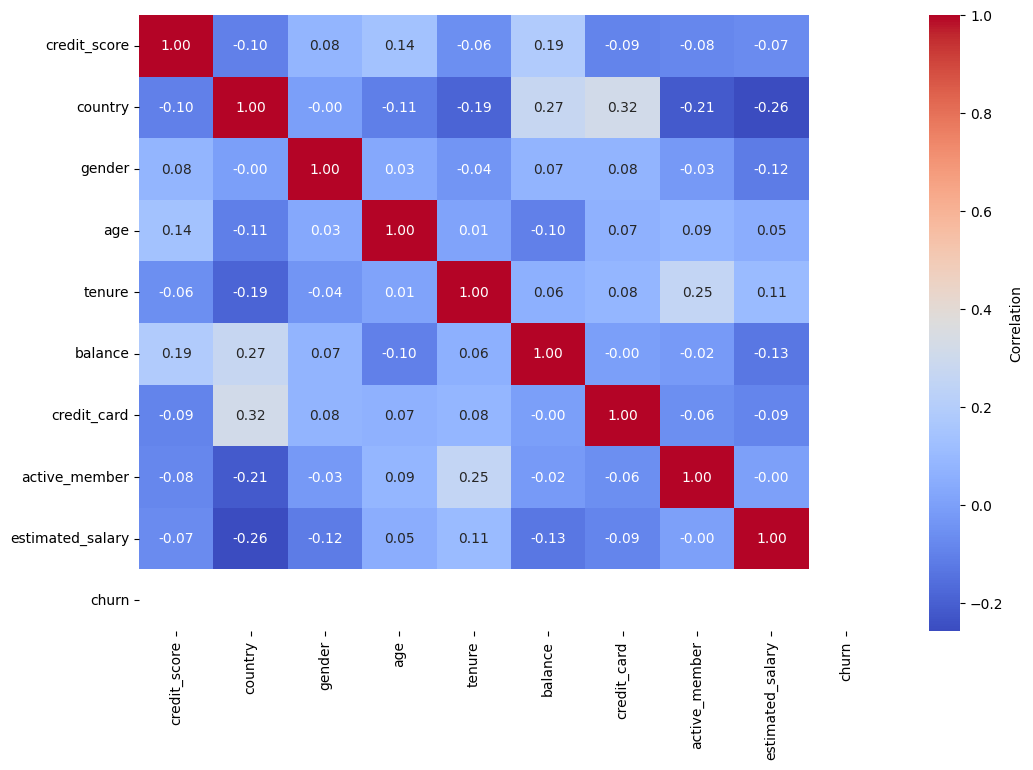

In [ ]:
corr_matrix = four_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

---

### 활동여부별 DataFrame

In [407]:
deactive_df = df[df['active_member'] == 0]

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
deactive_df['gender'] = deactive_df['gender'].map({'Male': 0, 'Female': 1})

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
deactive_df['country'] = deactive_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 active_member 컬럼 삭제
deactive_df.drop(['customer_id', 'active_member'], axis=1, inplace=True)

deactive_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1135411457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deactive_df['gender'] = deactive_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1135411457.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deactive_df['country'] = deactive_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\1135411457.py:10: SettingWithCopyWarning: 
A value is trying 

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,estimated_salary,churn
2,502,0,1,42,8,159660.80,3,1,113931.57,1
3,699,0,1,39,1,0.00,2,0,93826.63,0
5,645,2,0,44,8,113755.78,2,1,149756.71,1
7,376,1,1,29,4,115046.74,4,1,119346.88,1
10,528,0,0,31,6,102016.72,2,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...
9993,644,0,0,28,7,155060.41,1,1,29179.52,0
9994,800,0,1,29,2,0.00,2,0,167773.55,0
9995,771,0,0,39,5,0.00,2,1,96270.64,0
9998,772,1,0,42,3,75075.31,2,1,92888.52,1


age                 0.466271
balance             0.134219
gender              0.110484
country             0.055481
credit_card         0.016612
estimated_salary    0.012176
credit_score       -0.015894
tenure             -0.017550
products_number    -0.084700
Name: churn, dtype: float64


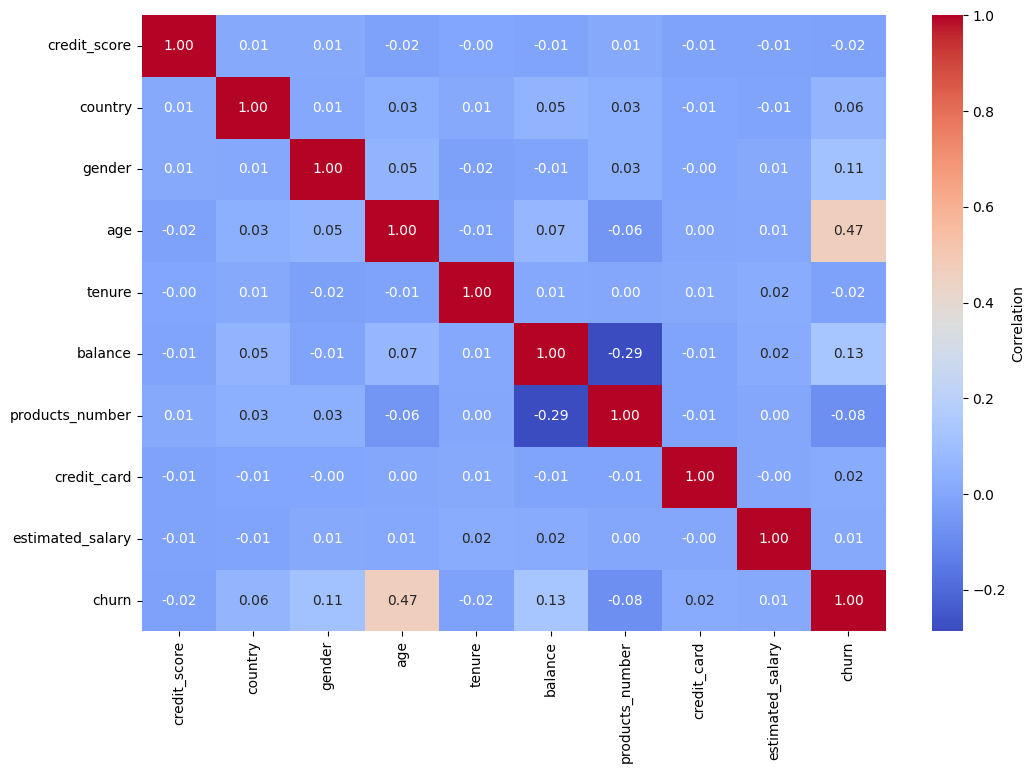

In [408]:
corr_matrix = deactive_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [409]:
active_df = df[df['active_member'] == 1]

# gender 컬럼을 이용하여 Male은 0, Female은 1로 인코딩
active_df['gender'] = active_df['gender'].map({'Male': 0, 'Female': 1})

# country 컬럼을 이용하여 France는 0, Germany는 1, Spain은 2로 인코딩
active_df['country'] = active_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})

# customer_id 컬럼과 active_member 컬럼 삭제
active_df.drop(['customer_id', 'active_member'], axis=1, inplace=True)

active_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\571055047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df['gender'] = active_df['gender'].map({'Male': 0, 'Female': 1})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\571055047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df['country'] = active_df['country'].map({'France': 0, 'Germany': 1, 'Spain': 2})
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8136\571055047.py:10: SettingWithCopyWarning: 
A value is trying to be set o

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,112542.58,0
4,850,2,1,43,2,125510.82,1,1,79084.10,0
6,822,0,0,50,7,0.00,2,1,10062.80,0
8,501,0,0,44,4,142051.07,2,0,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
9986,673,1,0,47,1,183579.54,2,0,34047.54,0
9987,606,2,0,30,8,180307.73,2,1,1914.41,0
9989,841,2,0,28,4,0.00,2,1,179436.60,0
9996,516,0,0,35,10,57369.61,1,1,101699.77,0


age                 0.173498
balance             0.101221
gender              0.098428
country             0.016966
estimated_salary    0.008528
products_number    -0.000664
tenure             -0.020285
credit_score       -0.032812
credit_card        -0.039600
Name: churn, dtype: float64


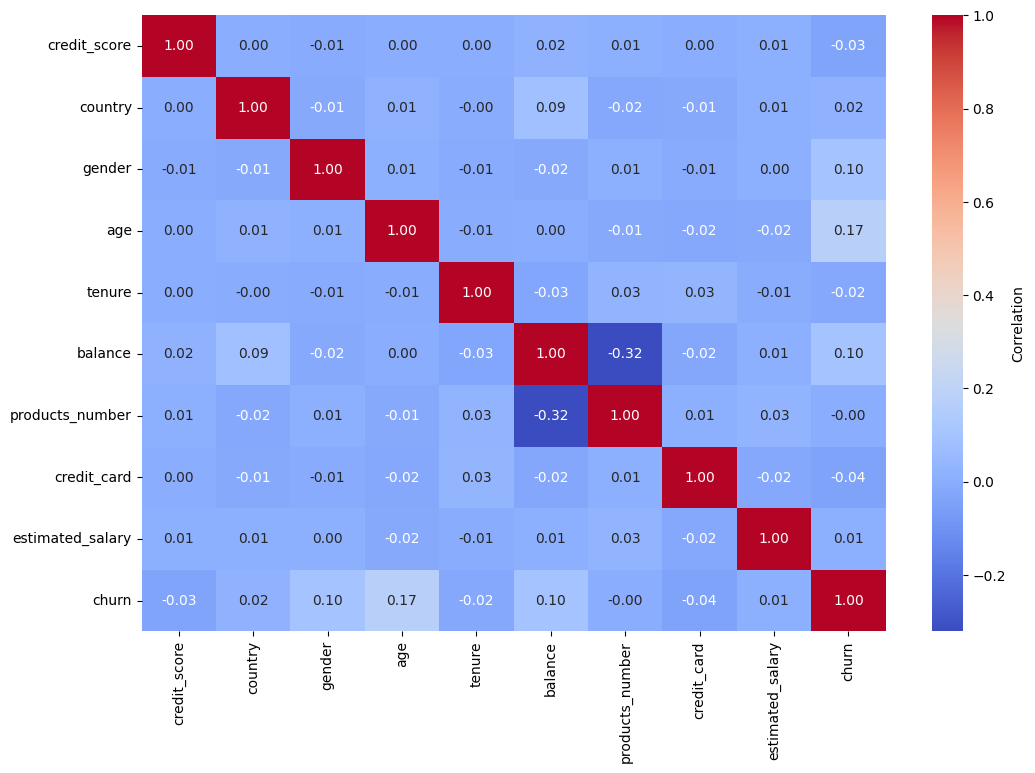

In [410]:
corr_matrix = active_df.corr()
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)
print(churn_corr_sorted)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()